Import bibliotek

In [130]:
import numpy as np
import pandas
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import Crypto
import torch

Tworzenie zbioru plików do eksperymentu

In [131]:
import os
import random
import string
from PIL import Image
from fpdf import FPDF
from docx import Document
import pandas as pd

BASE_DIR = "generated_files"
os.makedirs(BASE_DIR, exist_ok=True)

def generate_text_file(output_dir, size_mb, file_id):
    filename = os.path.join(output_dir, f"txt_file_{size_mb}MB_{file_id}.txt")
    content = ''.join(random.choices(string.ascii_letters + string.digits, k=1024))  # 1 KB tekstu

    with open(filename, 'w') as f:
        while os.path.getsize(filename) < size_mb * 1024 * 1024:
            f.write(content)
    print(f"Generated: {filename}")

def generate_image_file(output_dir, size_mb, file_id):
    filename = os.path.join(output_dir, f"image_file_{size_mb}MB_{file_id}.png")

    width, height = 1920, 1080
    while True:
        img = Image.new('RGB', (width, height), color=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
        img.save(filename, quality=90)
        if os.path.getsize(filename) >= size_mb * 1024 * 1024:
            break
        width += 500
        height += 500

    print(f"Generated: {filename}")

def generate_pdf_file(output_dir, size_mb, file_id):
    filename = os.path.join(output_dir, f"pdf_file_{size_mb}MB_{file_id}.pdf")
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font('Arial', size=12)

    text = ''.join(random.choices(string.ascii_letters + string.digits, k=1024))
    while True:
        pdf.cell(200, 10, txt=text, ln=True)
        pdf.output(filename)
        if os.path.getsize(filename) >= size_mb * 1024 * 1024:
            break

    print(f"Generated: {filename}")

def generate_docx_file(output_dir, size_mb, file_id):
    filename = f"{output_dir}\\docx_file_{size_mb}MB_{file_id}.docx"
    doc = Document()
    text = ''.join(random.choices(string.ascii_letters + string.digits, k=1024))  # 1 KB tekstu

    # Obliczamy ile takich linii potrzeba do osiągnięcia odpowiedniego rozmiaru
    num_paragraphs = (size_mb * 1024 * 1024) // (len(text) + 2)  # Dodajemy 2 bajty na znaki końca linii

    for _ in range(num_paragraphs):
        doc.add_paragraph(text)

    doc.save(filename)
    print(f"Generated: {filename}")


def generate_xlsx_file(output_dir, size_mb, file_id):
    filename = f"{output_dir}\\xlsx_file_{size_mb}MB_{file_id}.xlsx"

    num_rows = (size_mb * 1024 * 1024) // 50  # Szacujemy liczbę wierszy (zakładając ~50B na wiersz)

    data = {
        "Column1": [''.join(random.choices(string.ascii_letters, k=10)) for _ in range(num_rows)],
        "Column2": [random.randint(0, 1000) for _ in range(num_rows)]
    }

    df = pd.DataFrame(data)
    df.to_excel(filename, index=False)

    print(f"Generated: {filename}")


def generate_files():
    file_types = ["txt", "pdf", "docx", "xlsx"]  # Usuwamy "png", bo nie chcesz generować obrazów
    sizes_mb = [1, 5, 10]
    num_files_per_type = 8  # Generujemy teraz po 8 plików dla każdego typu

    for file_type in file_types:
        output_dir = os.path.join(BASE_DIR, file_type)
        os.makedirs(output_dir, exist_ok=True)

        for size_mb in sizes_mb:
            for file_id in range(5, num_files_per_type + 5):  # Numeracja od 5 do 8
                if file_type == "txt":
                    generate_text_file(output_dir, size_mb, file_id)
                elif file_type == "pdf":
                    generate_pdf_file(output_dir, size_mb, file_id)
                elif file_type == "docx":
                    generate_docx_file(output_dir, size_mb, file_id)
                elif file_type == "xlsx":
                    generate_xlsx_file(output_dir, size_mb, file_id)

#generate_files()


Szyfrowanie plików zgodnie w sposób losowy z podziałem na odpowiednie algorytmy szyfrowania

In [132]:
import os
import random
from Crypto.Cipher import AES, DES3, ChaCha20
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
from Crypto.Cipher import PKCS1_OAEP
import shutil  # Do przenoszenia plików

# Folder docelowy
DATASET_DIR = "dataset_files"
os.makedirs(DATASET_DIR, exist_ok=True)

def get_all_files(base_dir):
    file_paths = []
    for root, _, files in os.walk(base_dir):  # Przechodzi przez wszystkie katalogi
        for file in files:
            file_paths.append(os.path.join(root, file))
    return file_paths


def save_encrypted_file(filepath, data):
    with open(filepath, 'wb') as f:
        f.write(data)

def encrypt_aes256(input_path, output_path):
    key = get_random_bytes(32)  # 256-bit key
    cipher = AES.new(key, AES.MODE_EAX)
    with open(input_path, 'rb') as f:
        data = f.read()
    ciphertext, tag = cipher.encrypt_and_digest(data)
    save_encrypted_file(output_path, cipher.nonce + tag + ciphertext)

def encrypt_rsa(input_path, output_path):
    key = RSA.generate(2048)
    public_key = key.publickey().export_key()
    cipher = PKCS1_OAEP.new(key.publickey())
    with open(input_path, 'rb') as f:
        data = f.read()
    encrypted_data = cipher.encrypt(data[:190])  # RSA ma ograniczenie długości bloku
    save_encrypted_file(output_path, public_key + encrypted_data)

def encrypt_des(input_path, output_path):
    key = DES3.adjust_key_parity(get_random_bytes(24))  # 192-bit key
    cipher = DES3.new(key, DES3.MODE_EAX)
    with open(input_path, 'rb') as f:
        data = f.read()
    ciphertext, tag = cipher.encrypt_and_digest(data)
    save_encrypted_file(output_path, cipher.nonce + tag + ciphertext)

def encrypt_chacha20(input_path, output_path):
    key = get_random_bytes(32)
    cipher = ChaCha20.new(key=key)
    with open(input_path, 'rb') as f:
        data = f.read()
    ciphertext = cipher.encrypt(data)
    save_encrypted_file(output_path, cipher.nonce + ciphertext)

def encrypt_files(base_dir):
    encryption_methods = {
        "aes256": (encrypt_aes256, 35),
        "rsa": (encrypt_rsa, 10),
        "des": (encrypt_des, 20),
        "chacha20": (encrypt_chacha20, 35),
    }

    files = get_all_files(base_dir)
    random.shuffle(files)
    total_files = len(files)
    processed = 0

    for method, (func, percentage) in encryption_methods.items():
        num_files = int((percentage / 100) * total_files)
        for i in range(num_files):
            if processed >= total_files:
                break
            file_path = files[processed]
            processed += 1
            file_name, file_ext = os.path.splitext(os.path.basename(file_path))
            output_file = os.path.join(DATASET_DIR, f"{file_name}.{method if method != 'plain' else file_ext.lstrip('.')}")
            func(file_path, output_file)

# Wskaż folder z wygenerowanymi plikami
#encrypt_files("generated_files")


Wydobywanie cech plików w celu utworzenia pliku csv z wynikami analizy plików

In [143]:
import os
import numpy as np
from scipy.stats import skew, kurtosis, chisquare
from collections import Counter
import csv

DATASET_DIR = "dataset_files"
ENCRYPTION_METHODS = {"aes256", "chacha20", "rsa", "des"}  # Znane rozszerzenia szyfrowane

def shannon_entropy(data):
    if len(data) == 0:
        return 0
    _, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()  # Poprawka tutaj
    return -np.sum(probabilities * np.log2(probabilities))

def byte_histogram(data):
    counts = Counter(data)
    histogram = np.zeros(256, dtype=np.float32)
    for i in range(256):
        histogram[i] = counts[i]
    return histogram / histogram.sum() if histogram.sum() > 0 else histogram

def chi_square_uniformity(data):
    hist = byte_histogram(data) * len(data)  # Odtworzenie liczby bajtów
    expected = np.full(256, len(data) / 256)
    return chisquare(hist, expected)[0] if len(data) > 256 else 0  # Unikamy dzielenia przez zero

def extract_features(file_path):
    with open(file_path, "rb") as f:
        data = f.read()

    if not data:
        return None

    data_arr = np.array(list(data), dtype=np.uint8)

    entropy = shannon_entropy(data)
    mean = np.mean(data_arr)
    std_dev = np.std(data_arr)
    skewness = skew(data_arr) if len(data_arr) > 1 else 0
    kurtosis_value = kurtosis(data_arr) if len(data_arr) > 1 else 0
    file_size = len(data)
    file_size_mod16 = file_size % 16
    chi_square_value = chi_square_uniformity(data)
    byte_hist = byte_histogram(data)

    return [entropy, mean, std_dev, skewness, kurtosis_value, file_size, file_size_mod16, chi_square_value] + list(byte_hist)

def process_dataset(dataset_dir):
    output_file = "features_final.csv"
    with open(output_file, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        header = ["entropy", "mean", "std_dev", "skewness", "kurtosis", "file_size", "file_size_mod16", "chi_square"] + [f"byte_{i}" for i in range(256)] + ["label"]
        writer.writerow(header)

        for file in os.listdir(dataset_dir):
            file_path = os.path.join(dataset_dir, file)
            if os.path.isfile(file_path):
                features = extract_features(file_path)
                if features:
                    ext = file.split(".")[-1]
                    label = ext if ext in ENCRYPTION_METHODS else "plain"
                    writer.writerow(features + [label])

process_dataset(DATASET_DIR)
print("Cechy zapisane do features_final.csv")


Cechy zapisane do features_final.csv


In [144]:
df = pandas.read_csv("features_final.csv")
df

,entropy,mean,std_dev,skewness,kurtosis,file_size,file_size_mod16,chi_square,byte_0,byte_1,...,byte_247,byte_248,byte_249,byte_250,byte_251,byte_252,byte_253,byte_254,byte_255,label
0,-0.0,127.369892,73.943838,0.008143,-1.202708,95252,4,257.602996,0.004000,0.003958,...,0.003853,0.004021,0.003674,0.004157,0.003947,0.004052,0.003706,0.004147,0.003989,aes256
1,-0.0,127.393323,73.825370,-0.001055,-1.199097,95250,2,249.745082,0.003948,0.003790,...,0.003780,0.003528,0.003517,0.003759,0.004010,0.003990,0.003685,0.003874,0.004031,aes256
2,-0.0,127.506295,73.847180,-0.000579,-1.193833,95241,9,237.549274,0.003853,0.004011,...,0.003801,0.003801,0.004105,0.003591,0.003885,0.003979,0.004095,0.004210,0.004336,des
3,-0.0,127.944658,73.788243,-0.008806,-1.196064,95226,10,256.526539,0.003927,0.004085,...,0.003822,0.003728,0.004159,0.003654,0.003980,0.004022,0.003801,0.003854,0.004096,chacha20
4,-0.0,127.202285,73.944308,0.005244,-1.199535,95227,11,283.479682,0.003738,0.004011,...,0.003465,0.003917,0.004179,0.004169,0.003633,0.003875,0.004043,0.004001,0.003770,chacha20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.0,127.524229,73.878293,-0.000290,-1.198795,2217383,7,248.366998,0.003931,0.003890,...,0.003863,0.003927,0.003986,0.003857,0.003855,0.003871,0.003899,0.003938,0.003926,chacha20
150,-0.0,127.456595,73.870591,0.000126,-1.199014,2217546,10,241.155079,0.003861,0.003931,...,0.003890,0.003984,0.003893,0.003939,0.003928,0.003897,0.003892,0.003815,0.003930,chacha20
151,-0.0,127.472057,73.889930,0.000031,-1.199779,2217518,14,253.071480,0.003902,0.003915,...,0.003881,0.003937,0.003925,0.003899,0.003962,0.003849,0.003874,0.003829,0.003899,chacha20
152,-0.0,127.530352,73.855826,-0.000987,-1.198819,2217273,9,302.969845,0.003880,0.003881,...,0.003895,0.003932,0.003929,0.003915,0.003838,0.003967,0.003880,0.003885,0.003939,chacha20


In [146]:
decision_attribute = df["label"].describe()
decision_attribute

count        154
unique         4
top       aes256
freq          54
Name: label, dtype: object

In [147]:
class_distribution = df["label"].value_counts()
class_distribution

label
aes256      54
chacha20    54
des         31
rsa         15
Name: count, dtype: int64

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Wczytanie danych
data = pd.read_csv("features_final.csv")

# Podział na cechy (X) i etykiety (y)
X = data.drop(columns=["label"])
y = data["label"]

# Zamiana etykiet na liczby (np. aes256 → 0, chacha20 → 1, plain → 2, itd.)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Podział na zbiór treningowy (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizacja danych (potrzebna dla SVM i Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modele
models = {
    "SVM": SVC(kernel="rbf", C=1),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=10)  # Zamiast RotationForest
}


# Trenowanie i testowanie
for name, model in models.items():
    print(f"\n🔹 Trenowanie modelu: {name}")

    # Dla SVM i Naive Bayes używamy przeskalowanych danych, dla drzewa nie trzeba
    X_train_use = X_train_scaled if name in ["SVM", "Naive Bayes"] else X_train
    X_test_use = X_test_scaled if name in ["SVM", "Naive Bayes"] else X_test

    model.fit(X_train_use, y_train)
    y_pred = model.predict(X_test_use)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Dokładność: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



🔹 Trenowanie modelu: SVM
✅ Dokładność: 0.5806
              precision    recall  f1-score   support

      aes256       0.56      0.82      0.67        11
    chacha20       0.50      0.55      0.52        11
         des       0.00      0.00      0.00         6
         rsa       1.00      1.00      1.00         3

    accuracy                           0.58        31
   macro avg       0.52      0.59      0.55        31
weighted avg       0.47      0.58      0.52        31


🔹 Trenowanie modelu: Decision Tree
✅ Dokładność: 0.4516
              precision    recall  f1-score   support

      aes256       0.46      0.55      0.50        11
    chacha20       0.40      0.36      0.38        11
         des       0.20      0.17      0.18         6
         rsa       1.00      1.00      1.00         3

    accuracy                           0.45        31
   macro avg       0.52      0.52      0.52        31
weighted avg       0.44      0.45      0.44        31


🔹 Trenowanie modelu: Naiv

C:\Users\Jakub\Documents\EZI\ProjektZespo-owyBadawczy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jakub\Documents\EZI\ProjektZespo-owyBadawczy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jakub\Documents\EZI\ProjektZespo-owyBadawczy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

Wykresy


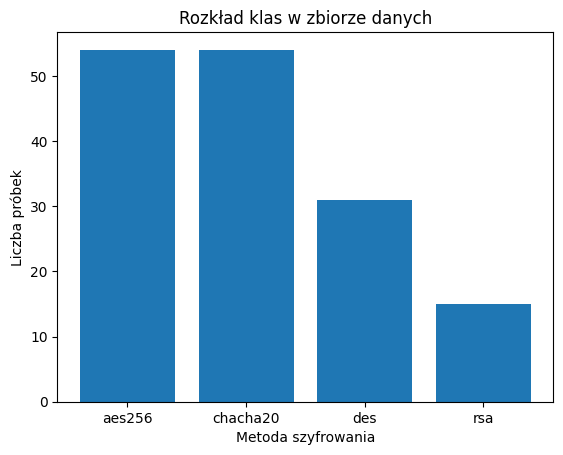

In [150]:
import matplotlib.pyplot as plt

labels, counts = np.unique(y, return_counts=True)
plt.bar(label_encoder.classes_, counts)
plt.xlabel("Metoda szyfrowania")
plt.ylabel("Liczba próbek")
plt.title("Rozkład klas w zbiorze danych")
plt.show()


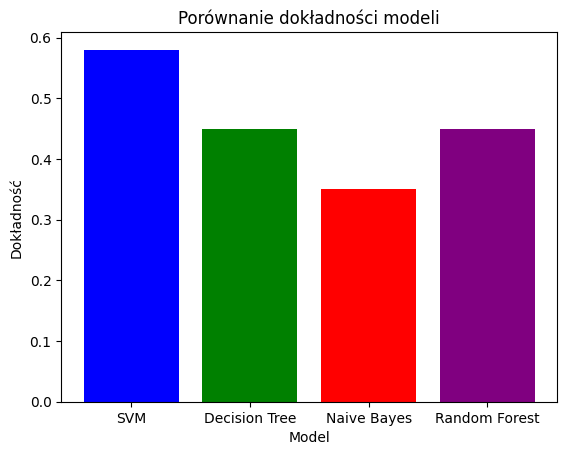

In [151]:
model_names = ["SVM", "Decision Tree", "Naive Bayes", "Random Forest"]
accuracy_scores = [0.58, 0.45, 0.35, 0.45]  # Zamień na swoje wyniki

plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Dokładność")
plt.title("Porównanie dokładności modeli")
plt.show()


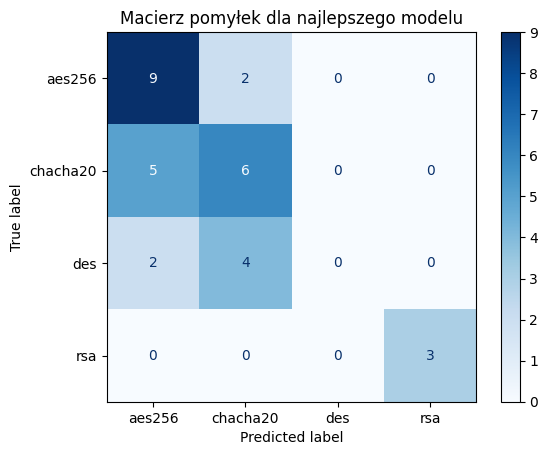

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = SVC(kernel="rbf", C=1)  # Jeśli SVM był najlepszy
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Macierz pomyłek dla najlepszego modelu")
plt.show()


C:\Users\Jakub\Documents\EZI\ProjektZespo-owyBadawczy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jakub\Documents\EZI\ProjektZespo-owyBadawczy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jakub\Documents\EZI\ProjektZespo-owyBadawczy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

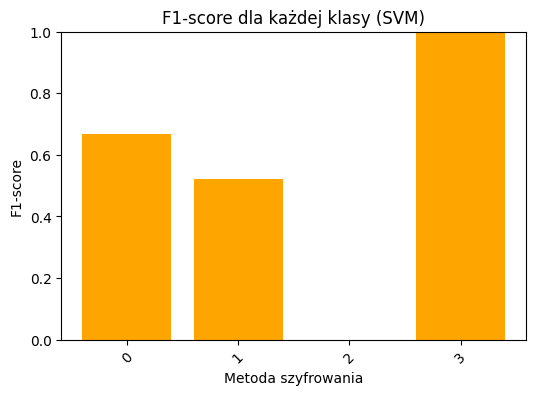

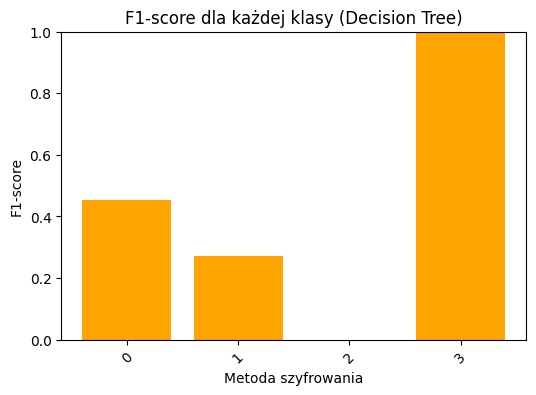

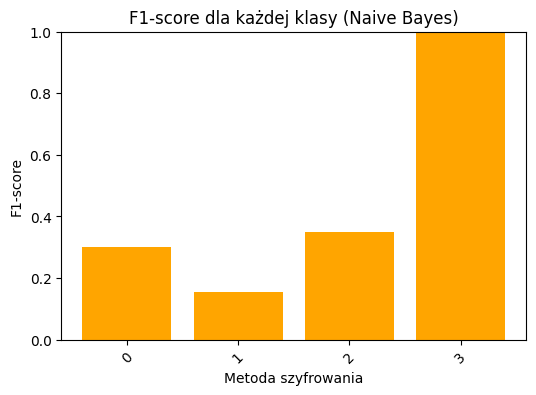

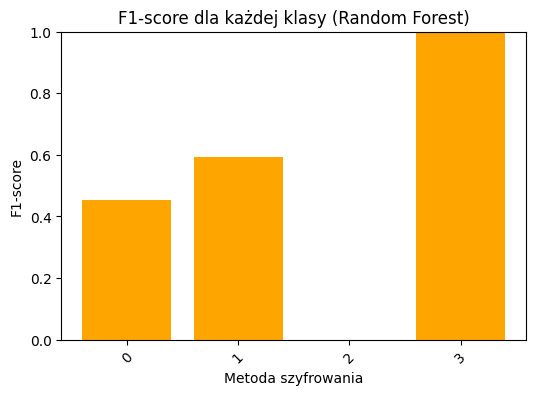

In [155]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Iterujemy przez wszystkie modele
for name, model in models.items():
    # Wybór przeskalowanych danych dla SVM i Naive Bayes
    X_train_use = X_train_scaled if name in ["SVM", "Naive Bayes"] else X_train
    X_test_use = X_test_scaled if name in ["SVM", "Naive Bayes"] else X_test

    # Trenowanie i predykcja
    model.fit(X_train_use, y_train)
    y_pred = model.predict(X_test_use)

    # Generowanie raportu klasyfikacji
    report = classification_report(y_test, y_pred, output_dict=True)

    # Pobranie nazw klas (bez accuracy, macro avg itd.)
    class_labels = list(report.keys())[:-3]
    f1_scores = [report[label]["f1-score"] for label in class_labels]

    # Wykres F1-score
    plt.figure(figsize=(6, 4))
    plt.bar(class_labels, f1_scores, color="orange")
    plt.xlabel("Metoda szyfrowania")
    plt.ylabel("F1-score")
    plt.title(f"F1-score dla każdej klasy ({name})")
    plt.ylim(0, 1)  # F1-score mieści się w przedziale 0-1
    plt.xticks(rotation=45)
    plt.show()
